In [3]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_grid(imgs, titles, rows, cols, figsize):
    fig, axs = plt.subplots(rows, cols, figsize=figsize) # Cria um grid para as imgs
    for a, i, t in zip(axs.flatten(), imgs, titles):
        # Adiciona uma imagem (i) na posição correta (a):
        a.imshow(i, cmap='gray', aspect='equal', interpolation=None, vmin=0, vmax=255)
        a.set_title(t)
    # Desativa o eixo das imagens (separado pois o número de imgs pode não preencher o grid):
    for a in axs.flatten(): a.set_axis_off()

    plt.tight_layout()
    plt.show()
    return fig, axs

In [46]:
baboon = io.imread('./baboon.png').astype(np.uint8)
watch = io.imread('./watch.png').astype(np.uint8)

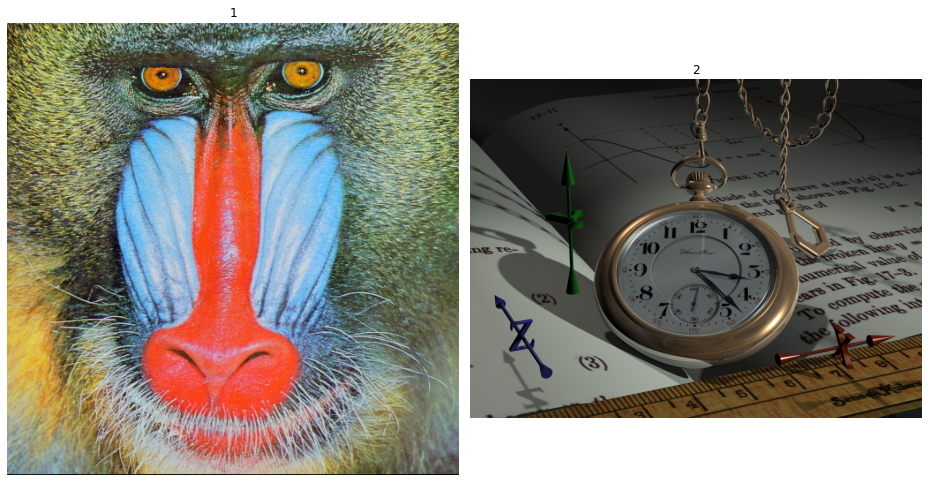

In [47]:
f1, axs1 = plot_grid([baboon, watch], range(1, 3), 1, 2, (13, 13))

In [30]:
f = open("hello_world", "rb")
file = list(f.read())
f.close()
size = len(file)

In [51]:
def encode(img, file, size, plane=0):
    # Checks if the file fits in the image:
    bit_file_size = 8 * (size + 4)  # 4 bytes for the size header
    if img.size < bit_file_size:
        raise Exception("File is too big!")

    # Adds the size header:
    size_bytes = list(size.to_bytes(4, 'big'))
    file = np.array(size_bytes + file, dtype=np.uint8)

    bit_file = np.unpackbits(file)  # unpacks each byte to a binary form

    # Creates the mask/values used to overwrite the original image:
    left_over = img.size - bit_file_size

    bit_values = bit_file << plane
    mask = np.full(bit_file_size, 1 << plane)

    bit_values = np.pad(bit_values, (0, left_over), mode='constant', constant_values=0)
    mask = np.pad(mask, (0, left_over), mode='constant', constant_values=0)

    bit_values = bit_values.reshape(img.shape)
    mask = mask.reshape(img.shape)

    # Applies the mask:
    result = img & (255 - mask)  # erases the bit
    result |= bit_values  # writes the bit value
    return result.astype(np.uint8)


result = encode(baboon, file, size, 0)
io.imsave('baboon-hello_wolrd.png', result, check_contrast=False)

In [53]:
def decode(img, plane=0):
    bit_file = np.unpackbits(img)[plane::8]
    file = np.packbits(bit_file)
    size = int.from_bytes(file[:4], byteorder='big', signed=False)
    return file[4:4 + size]


decode_file = decode(result, 0)
f = open("hello_world-decode", "wb")
arr = bytearray(decode_file)
f.write(arr)
f.close()